In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
df = pd.read_csv('Cleansed-training 20apr_A.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3291 entries, 0 to 3290
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3291 non-null   object 
 1   age                3291 non-null   int64  
 2   hypertension       3291 non-null   object 
 3   heart_disease      3291 non-null   object 
 4   ever_married       3291 non-null   object 
 5   work_type          3291 non-null   object 
 6   residence_type     3291 non-null   object 
 7   avg_glucose_level  3291 non-null   float64
 8   bmi                3291 non-null   float64
 9   smoking_status     3291 non-null   object 
 10  stroke             3291 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 282.9+ KB


In [3]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [4]:
df.shape

(3291, 11)

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,3291,2,Female,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,3291.0,NaN,NaN,NaN,54.572774,14.408851,31.0,43.0,54.0,65.0,82.0
hypertension,3291,2,No,2871,NaN,NaN,NaN,NaN,NaN,NaN,NaN
heart_disease,3291,2,No,3257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ever_married,3291,2,Yes,2927,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_type,3291,3,Private,2037,NaN,NaN,NaN,NaN,NaN,NaN,NaN
residence_type,3291,2,Urban,1674,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_glucose_level,3291.0,NaN,NaN,NaN,109.792616,48.969114,55.22,77.725,92.73,117.325,267.76
bmi,3291.0,NaN,NaN,NaN,30.819265,6.812515,11.3,26.3,29.7,34.3,59.7
smoking_status,3291,4,never smoked,1341,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
new_df = df.copy()

In [7]:
df.nunique()

gender                  2
age                    52
hypertension            2
heart_disease           2
ever_married            2
work_type               3
residence_type          2
avg_glucose_level    2825
bmi                   359
smoking_status          4
stroke                  2
dtype: int64

let's print the different unique labels
df['gender'].unique()

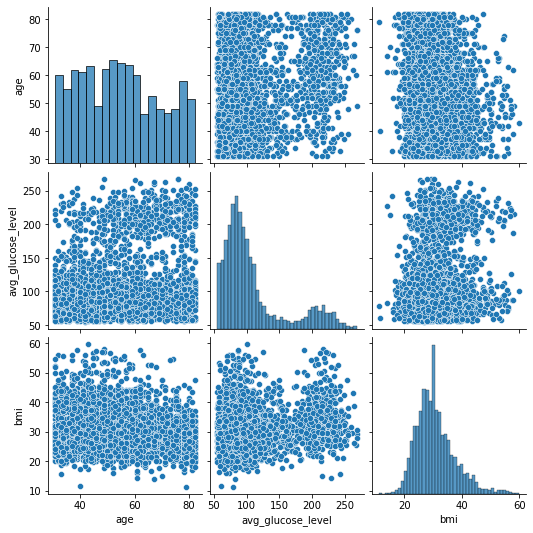

In [8]:
import seaborn as sns
sns.pairplot(data=new_df)

<AxesSubplot:>

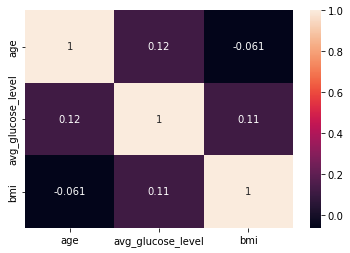

In [9]:
sns.heatmap(new_df.corr(method='spearman'), annot=True)

<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

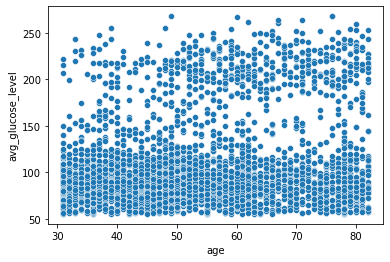

In [10]:
sns.scatterplot(data=new_df, x='age', y='avg_glucose_level')


<AxesSubplot:xlabel='avg_glucose_level', ylabel='stroke'>

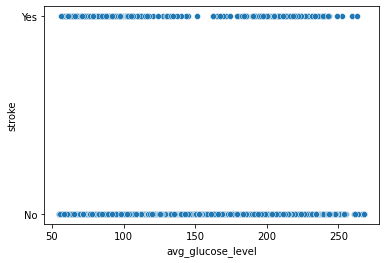

In [11]:
sns.scatterplot(data=new_df, y='stroke', x='avg_glucose_level')

<AxesSubplot:>

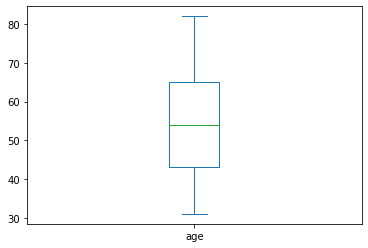

In [12]:
df['age'].plot.box()

<AxesSubplot:>

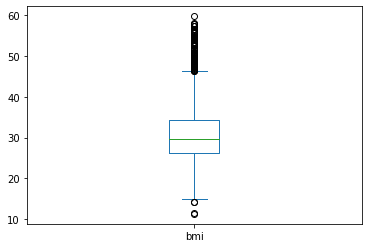

In [13]:
df['bmi'].plot.box() 

pip install missingno

<AxesSubplot:>

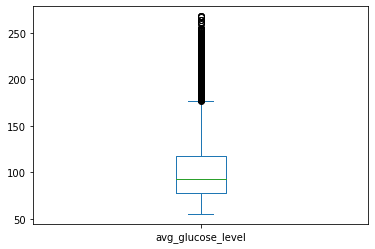

In [14]:
df['avg_glucose_level'].plot.box()  

EDA using Python pkg

In [15]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [16]:
from pandas_profiling import ProfileReport
report = ProfileReport(new_df)

In [17]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3291 entries, 0 to 3290
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3291 non-null   object 
 1   age                3291 non-null   int64  
 2   hypertension       3291 non-null   object 
 3   heart_disease      3291 non-null   object 
 4   ever_married       3291 non-null   object 
 5   work_type          3291 non-null   object 
 6   residence_type     3291 non-null   object 
 7   avg_glucose_level  3291 non-null   float64
 8   bmi                3291 non-null   float64
 9   smoking_status     3291 non-null   object 
 10  stroke             3291 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 282.9+ KB


Removing outliers for BMI values 

In [19]:
report.to_file('output_3k.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
new_df

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
1,Female,61,No,No,Yes,Self-employed,Rural,202.21,29.7,never smoked,Yes
2,Male,80,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes
3,Female,49,No,No,Yes,Private,Urban,171.23,34.4,smokes,Yes
4,Female,79,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes
...,...,...,...,...,...,...,...,...,...,...,...
3286,Female,80,Yes,No,Yes,Private,Urban,83.75,29.7,never smoked,No
3287,Female,81,No,No,Yes,Self-employed,Urban,125.20,40.0,never smoked,No
3288,Female,35,No,No,Yes,Self-employed,Rural,82.99,30.6,never smoked,No
3289,Male,51,No,No,Yes,Private,Rural,166.29,25.6,formerly smoked,No


In [21]:
new_df.skew()

C:\Users\USER\AppData\Local\Temp/ipykernel_12148/3313494185.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_df.skew()


age                  0.210755
avg_glucose_level    1.401764
bmi                  0.935603
dtype: float64

In [22]:
stroke_df = new_df[new_df['stroke']=='Yes']
nonstroke_df = new_df[new_df['stroke']=='No']

<AxesSubplot:ylabel='age'>

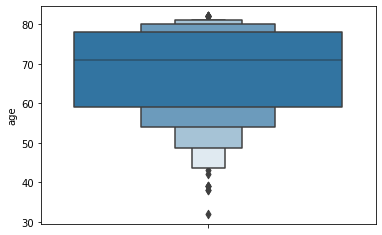

In [23]:
sns.boxenplot(y=stroke_df['age'])

<AxesSubplot:ylabel='age'>

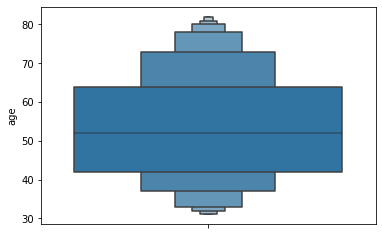

In [24]:
sns.boxenplot(y=nonstroke_df['age'])

In [25]:
stroke_df = new_df[new_df['stroke']=='Yes']
nonstroke_df = new_df[new_df['stroke']=='No']

<Figure size 1800x576 with 0 Axes>

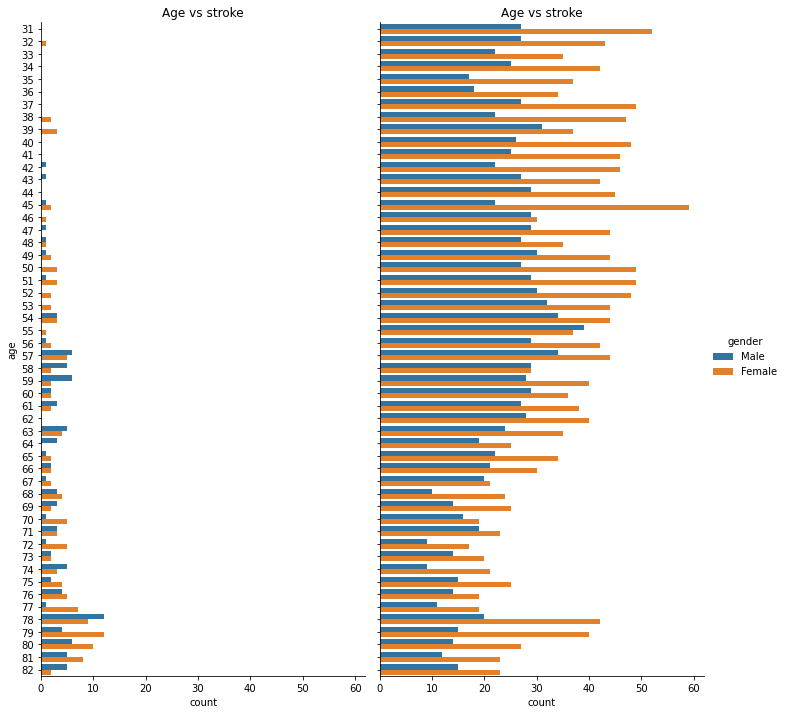

In [26]:
plt.figure(figsize=(25,8))
age_stroke = sns.catplot(data=new_df, y='age', hue='gender', col='stroke', kind="count", height=10, aspect=.5).set(title='Age vs stroke')





<AxesSubplot:xlabel='age', ylabel='count'>

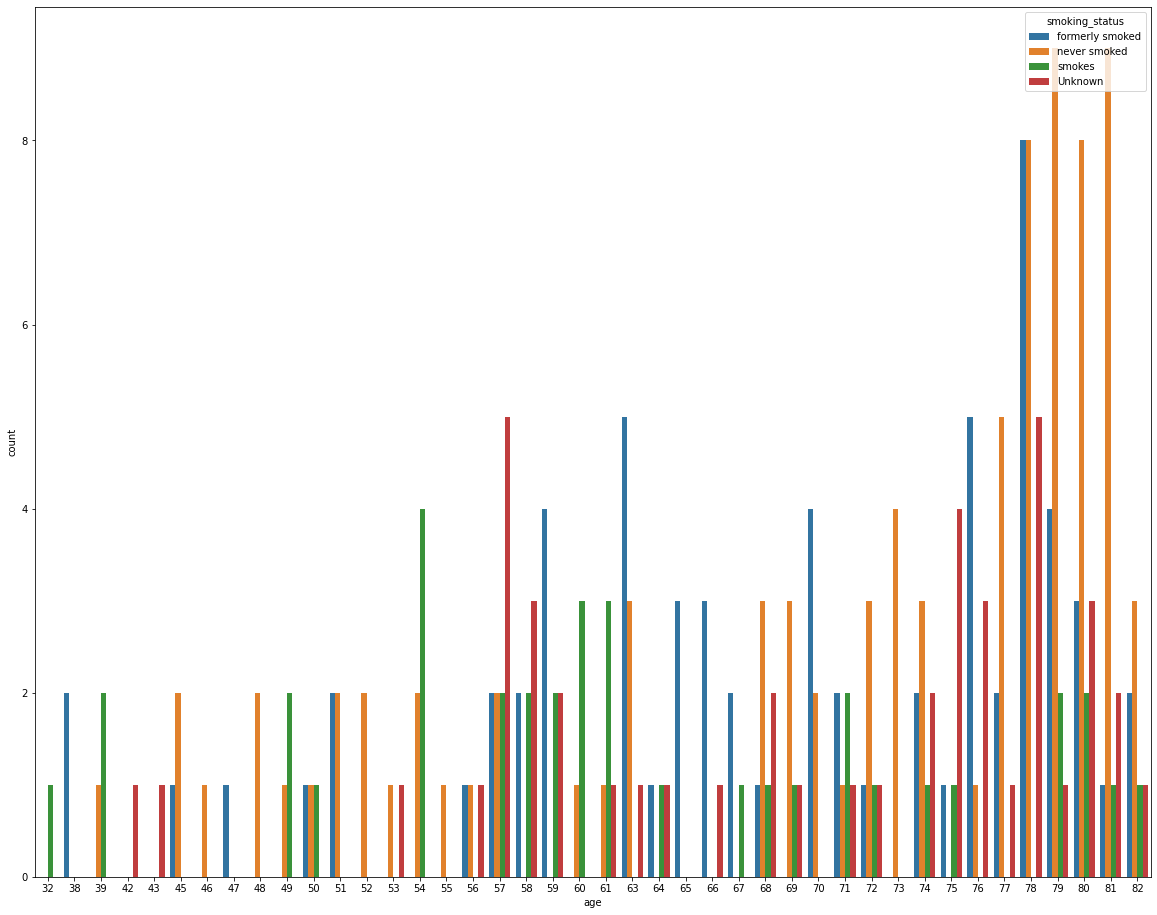

In [27]:
plt.figure(figsize=(20,16))
sns.countplot(data=stroke_df, x='age', hue='smoking_status')

<AxesSubplot:xlabel='age', ylabel='count'>

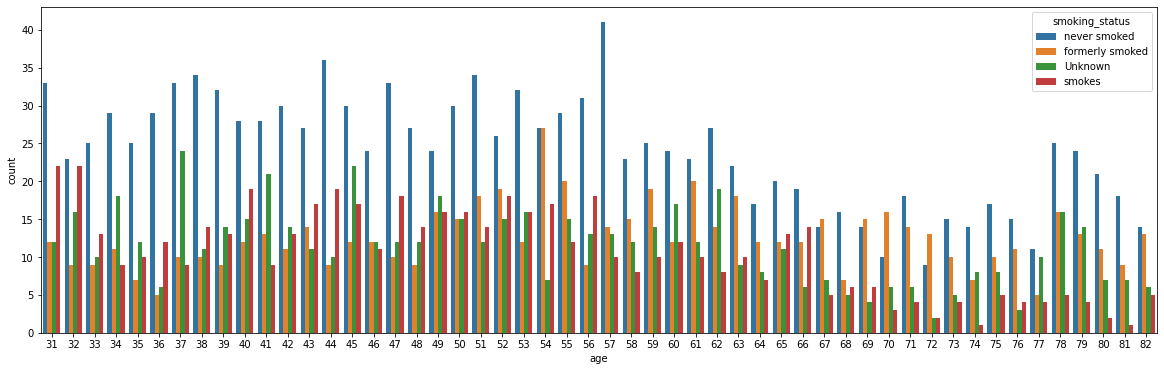

In [28]:
plt.figure(figsize=(20,6))
sns.countplot(data=nonstroke_df, x='age', hue='smoking_status')

In [29]:
smoke_df = new_df[new_df['smoking_status']=='smokes']
nonsmoke_df = new_df[new_df['smoking_status']=='never smoked']
formersmoke_df = new_df[new_df['smoking_status']=='formerly smoked'] 

<AxesSubplot:xlabel='age', ylabel='count'>

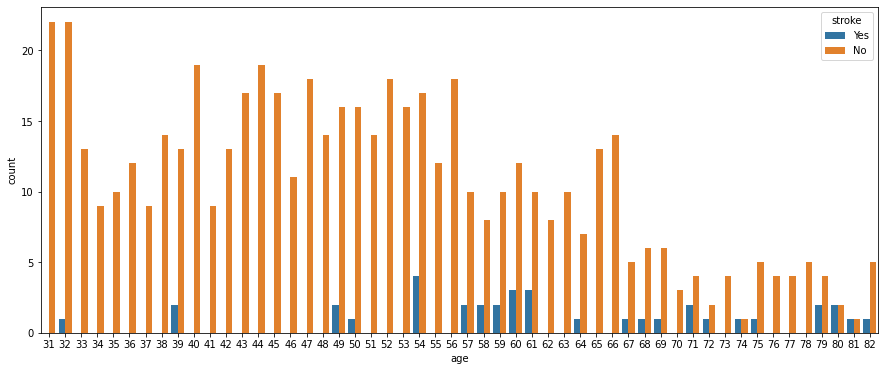

In [30]:
plt.figure(figsize=(15,6))
sns.countplot(data=smoke_df, x='age', hue='stroke')

<AxesSubplot:xlabel='age', ylabel='count'>

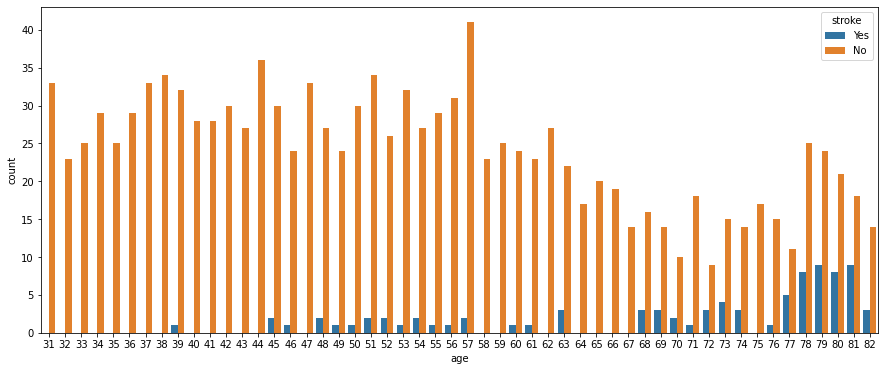

In [31]:
plt.figure(figsize=(15,6))
sns.countplot(data=nonsmoke_df, x='age', hue='stroke')

<AxesSubplot:xlabel='age', ylabel='count'>

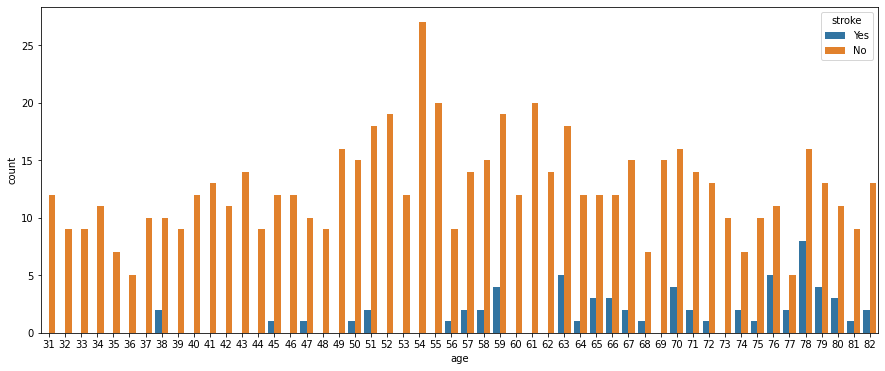

In [32]:
plt.figure(figsize=(15,6))
sns.countplot(data=formersmoke_df, x='age', hue='stroke')

<AxesSubplot:xlabel='count', ylabel='stroke'>

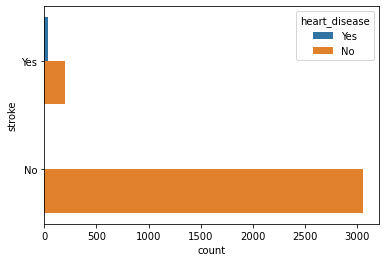

In [33]:
sns.countplot(y='stroke', hue='heart_disease', data=new_df, orient='h')

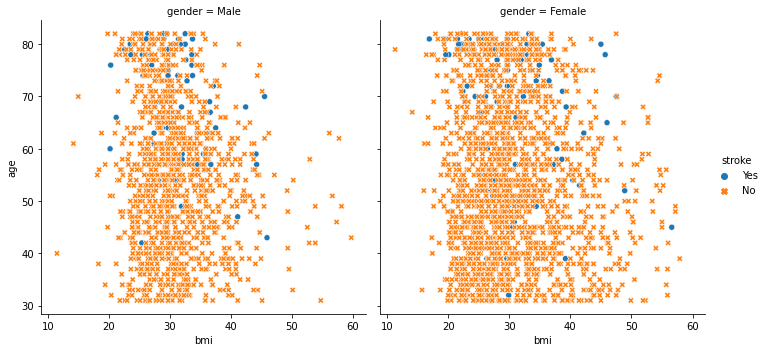

In [34]:
sns.relplot(data=new_df, x="bmi", y="age", col="gender", hue="stroke", style="stroke")

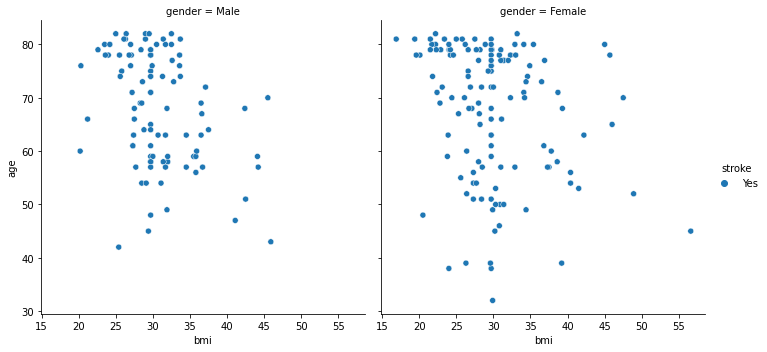

In [35]:
stroke_df = new_df[new_df['stroke']=='Yes']
sns.relplot(data=stroke_df, x="bmi", y="age", col="gender", hue="stroke", style="stroke")

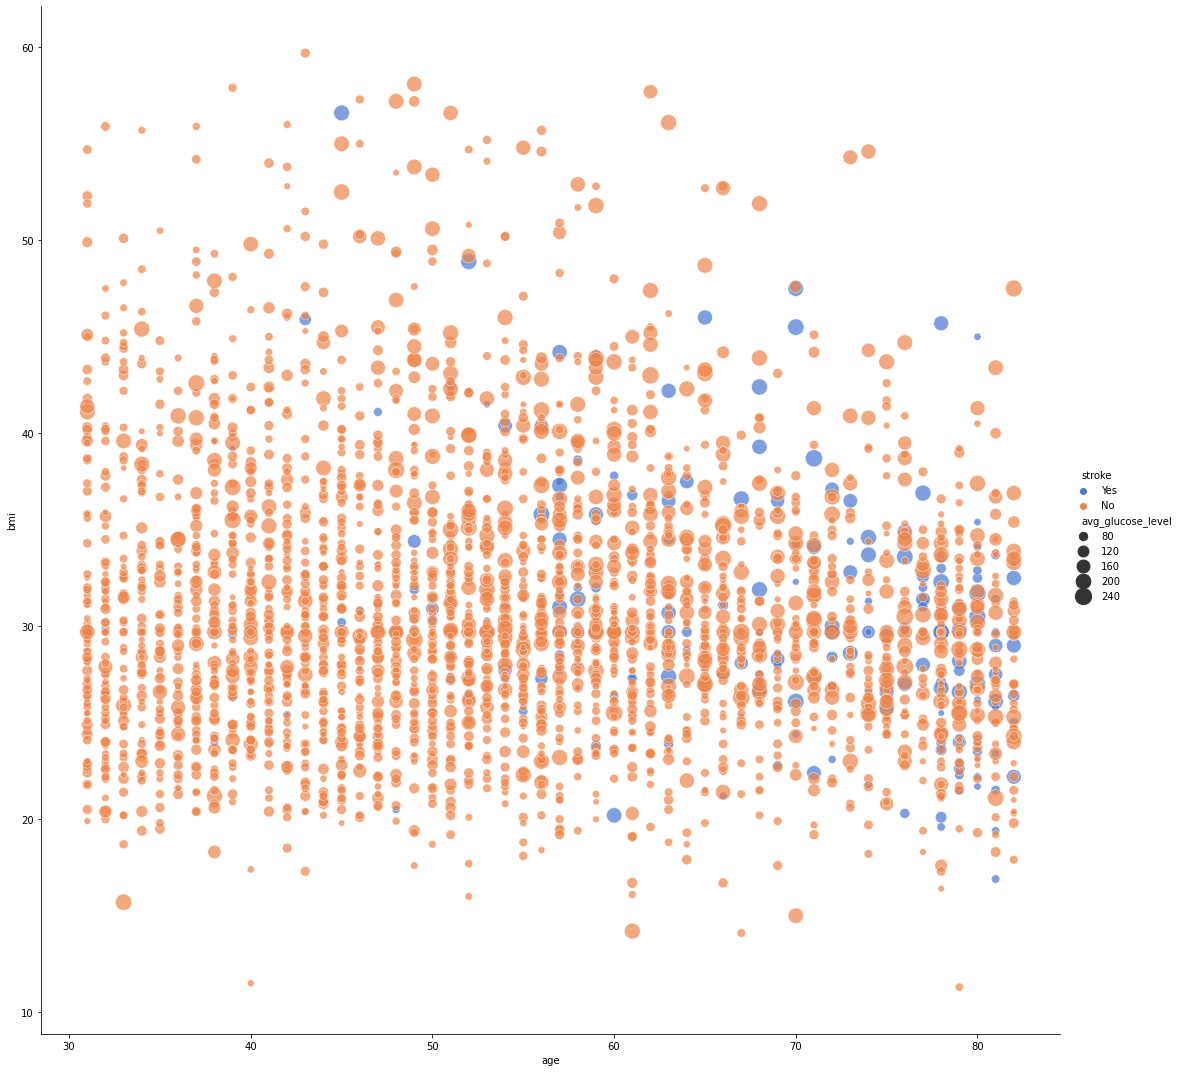

In [36]:
sns.relplot(x="age", y="bmi", hue="stroke", size="avg_glucose_level",
            sizes=(40, 300), alpha=.7, palette="muted",
            height=15, data=new_df)

[Text(0, 0.5, '')]

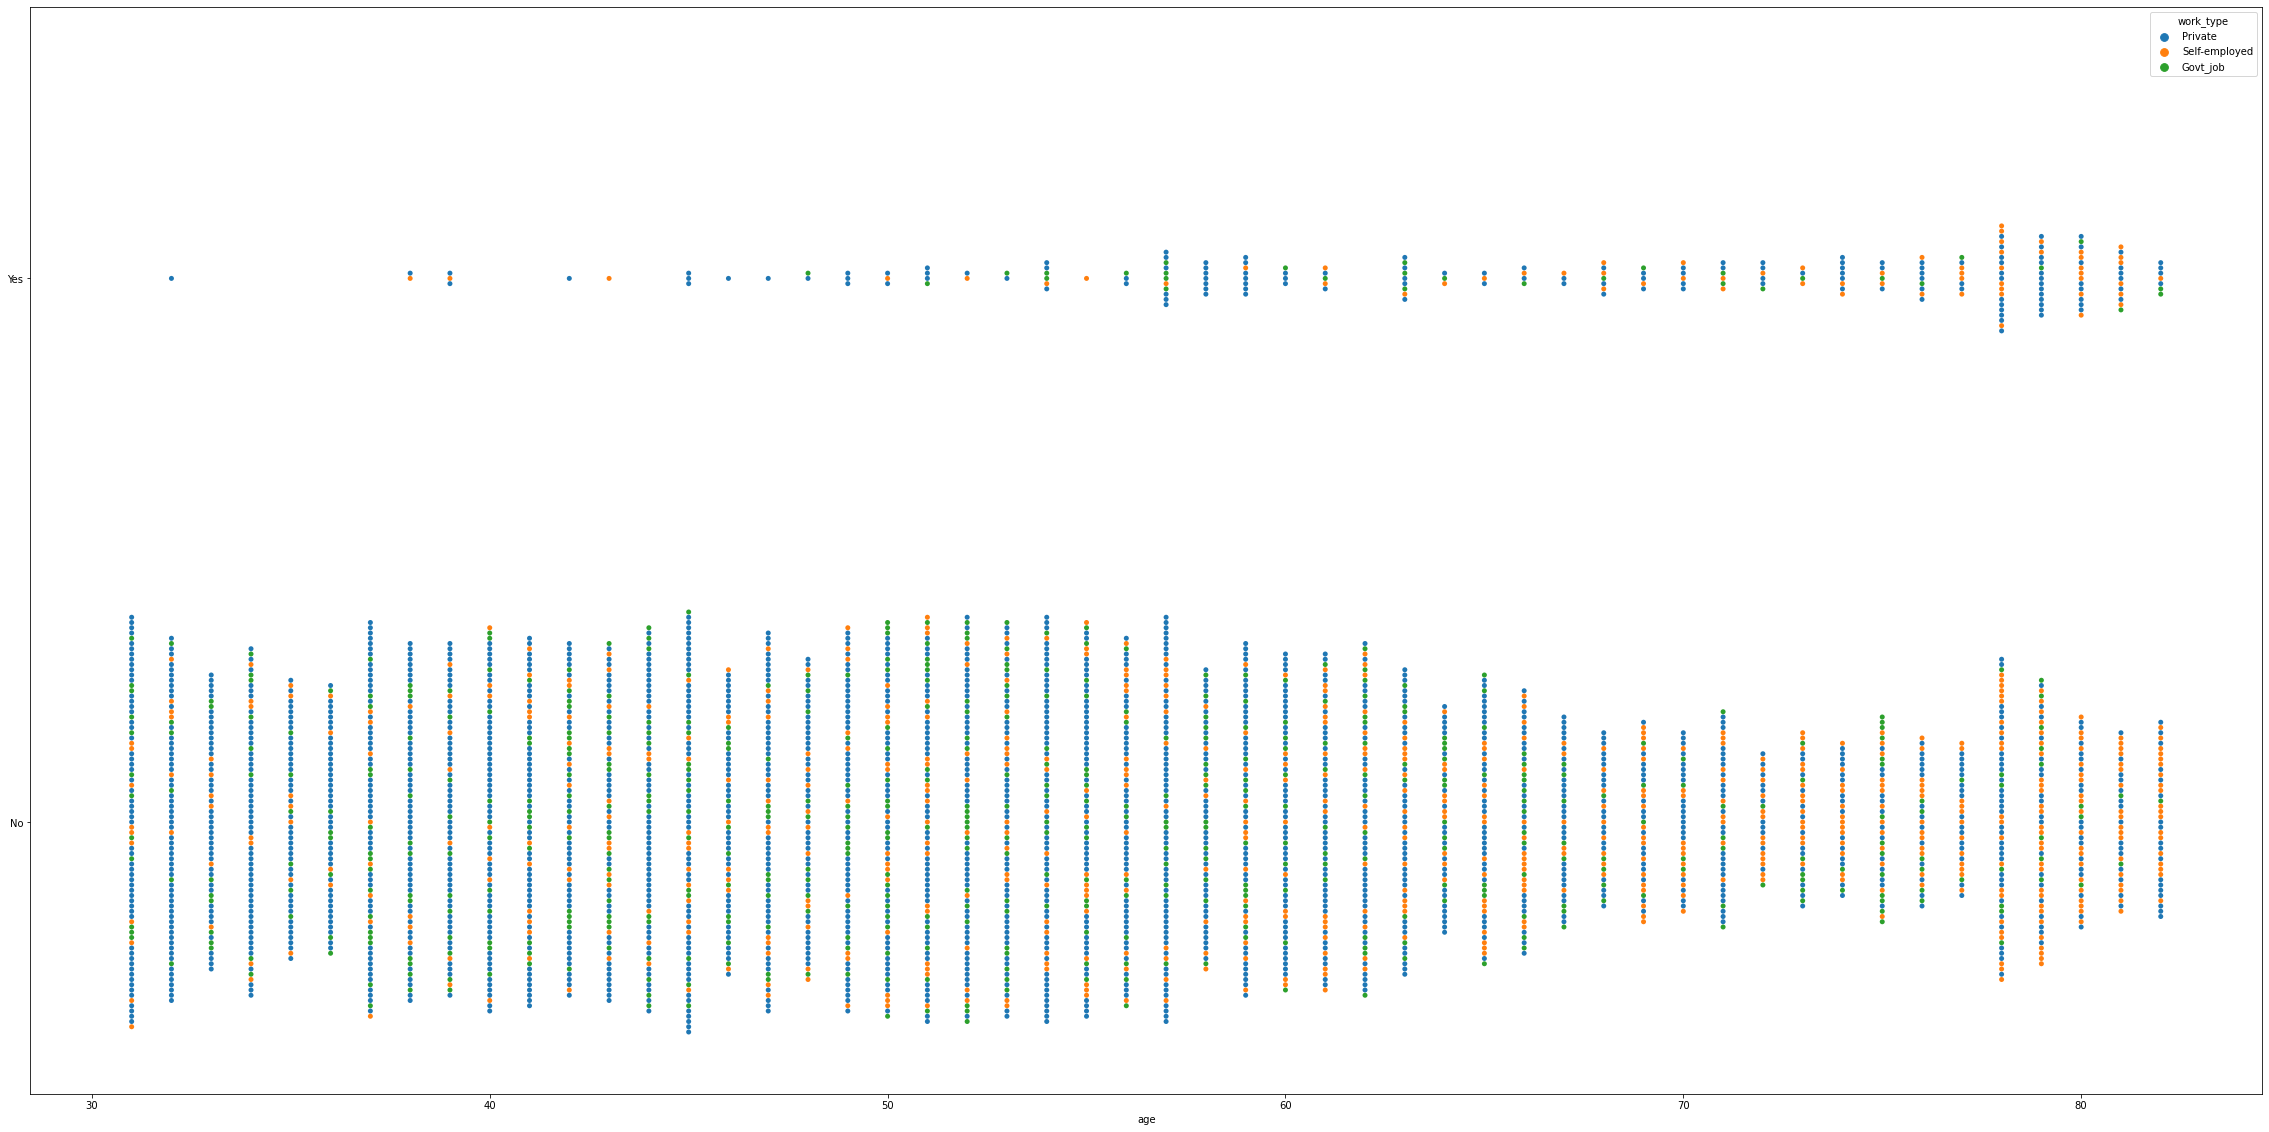

In [37]:
fig, ax = plt.subplots(figsize=(40, 20))
ax = sns.swarmplot(data=new_df, x="age", y="stroke", hue="work_type")
ax.set(ylabel="")

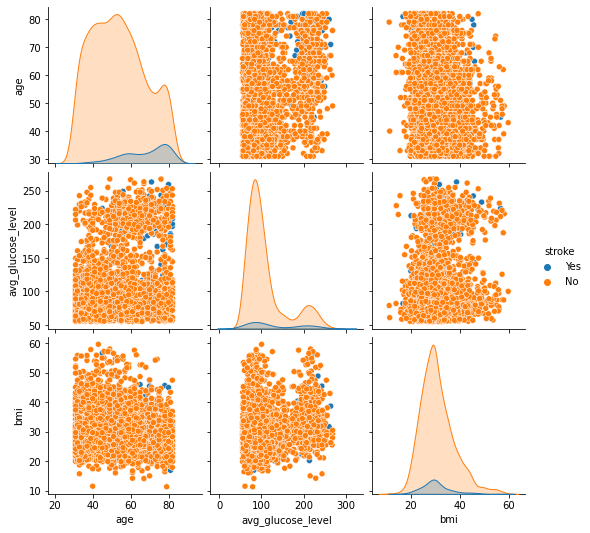

In [38]:
sns.pairplot(new_df, hue="stroke")

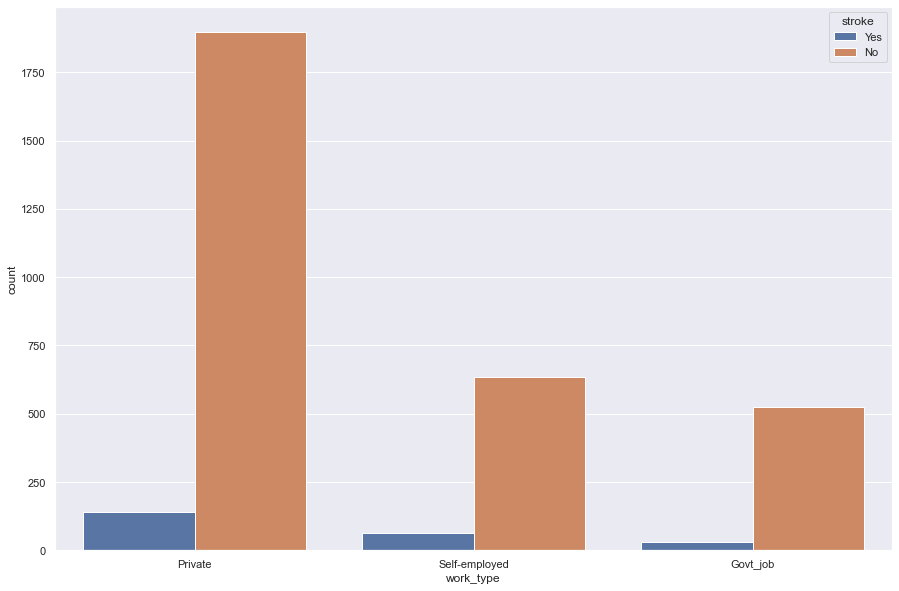

In [39]:
sns.set(rc={'figure.figsize':(15,10)})
stroke_heart=sns.countplot(x='work_type', hue='stroke', data=new_df)

In [40]:
pd.crosstab(new_df.work_type,new_df.stroke, normalize='index')

stroke,No,Yes
work_type,,
Govt_job,0.944345,0.055655
Private,0.930781,0.069219
Self-employed,0.911047,0.088953


In [41]:
male_df = new_df[new_df['gender']=='Male']
Female_df = new_df[new_df['gender']=='Female']

stroke,No,Yes
work_type,,
Govt_job,0.957746,0.042254
Private,0.918465,0.081535
Self-employed,0.897959,0.102041


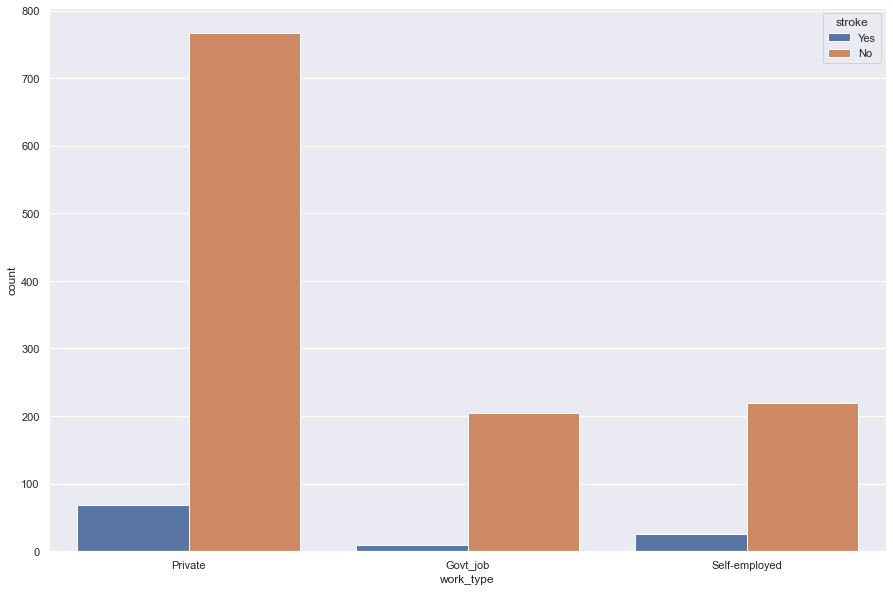

In [42]:
sns.set(rc={'figure.figsize':(15,10)})
stroke_heart=sns.countplot(x='work_type', hue='stroke', data=male_df)
pd.crosstab(male_df.work_type,male_df.stroke, normalize='index')

stroke,No,Yes
work_type,,
Govt_job,0.936047,0.063953
Private,0.939318,0.060682
Self-employed,0.918142,0.081858


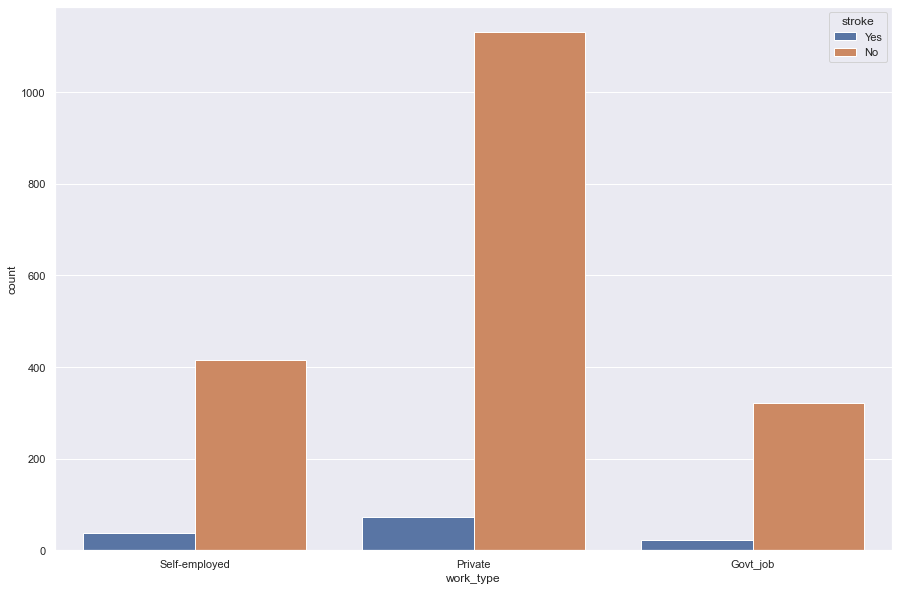

In [43]:
sns.set(rc={'figure.figsize':(15,10)})
stroke_heart=sns.countplot(x='work_type', hue='stroke', data=Female_df)
pd.crosstab(Female_df.work_type,Female_df.stroke, normalize='index')